In [63]:
# working with radioactive decay with following knowns
# N(t) = N0 Exp[-t/tau]
# dN/dt = -(1/tau) N(t)
# tau = t_half / ln(2)

import math
import numpy as np
from scipy.integrate import solve_ivp

# for solve_ivp, this needs to be of the form:
# name(time, variables, args)
def dN_dt(t, N, tau): 
    return (-1.0/tau) * N

t_half = 10 # seconds
tau = t_half/math.log(2.0)
N0 = 100 # number of intial atoms

tspan = [0,3*t_half]
solution_RK23 = solve_ivp(
    dN_dt, # derivative as function
    tspan,  # time interval to solve for
    [N0], # initial values
    args=(tau,) # why does this have to have a comma?  needs to be a "tuple"????
    , method="RK23"
)

solution_RK45 = solve_ivp(
    dN_dt, # derivative as function
    tspan,  # time interval to solve for
    [N0], # initial values
    args=(tau,) # why does this have to have a comma?  needs to be a "tuple"????
    , method="RK45"
)

# this was helpful for syntax 
# https://simulationbased.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/comment-page-1/


In [75]:
print(solution_RK23)
print()
print(solution_RK45)


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.245e-02  5.769e-01  5.354e+00  1.075e+01
             1.627e+01  2.181e+01  2.735e+01  3.000e+01]
        y: [[ 1.000e+02  9.964e+01  9.608e+01  6.895e+01  4.738e+01
              3.229e+01  2.196e+01  1.494e+01  1.243e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 26
     njev: 0
      nlu: 0

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.705e-01  1.876e+00  1.530e+01  2.793e+01
             3.000e+01]
        y: [[ 1.000e+02  9.882e+01  8.781e+01  3.466e+01  1.444e+01
              1.251e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 32
     njev: 0
      nlu: 0


In [67]:
print(solution_RK23.t)
print(solution_RK23.y[0])

[ 0.          0.05244768  0.5769245   5.35434058 10.75013045 16.26637129
 21.80736852 27.35352498 30.        ]
[100.          99.63712038  96.07995912  68.94998248  47.38337507
  32.28822078  21.96376196  14.93522861  12.43143598]


Text(0.5, 0, 'time (seconds), t_1/2 = 10.00')

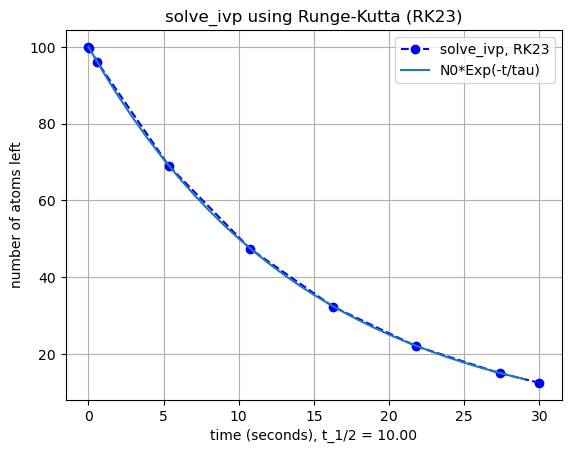

In [77]:
import matplotlib.pyplot as plt
plt.plot(solution_RK23.t,solution_RK23.y[0],label="solve_ivp, RK23", linestyle='--', marker='o', color='b')
tvals=np.arange(0,3*t_half)
plt.plot(tvals,N0*np.exp(-tvals/tau), label="N0*Exp(-t/tau)")
plt.grid()
plt.legend()
plt.title("solve_ivp using Runge-Kutta (RK23)")
plt.ylabel("number of atoms left")
plt.xlabel("time (seconds), t_1/2 = %.2f"%t_half)

Text(0.5, 0, 'time (seconds), t_1/2 = 10.00')

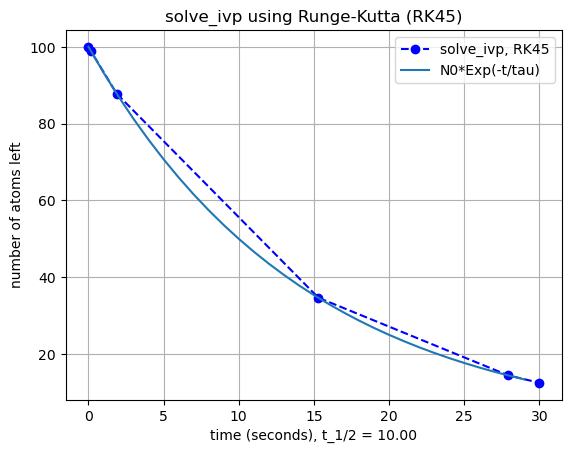

In [79]:
import matplotlib.pyplot as plt
plt.plot(solution_RK45.t,solution_RK45.y[0],label="solve_ivp, RK45", linestyle='--', marker='o', color='b')
tvals=np.arange(0,3*t_half)
plt.plot(tvals,N0*np.exp(-tvals/tau), label="N0*Exp(-t/tau)")
plt.grid()
plt.legend()
plt.title("solve_ivp using Runge-Kutta (RK45)")
plt.ylabel("number of atoms left")
plt.xlabel("time (seconds), t_1/2 = %.2f"%t_half)